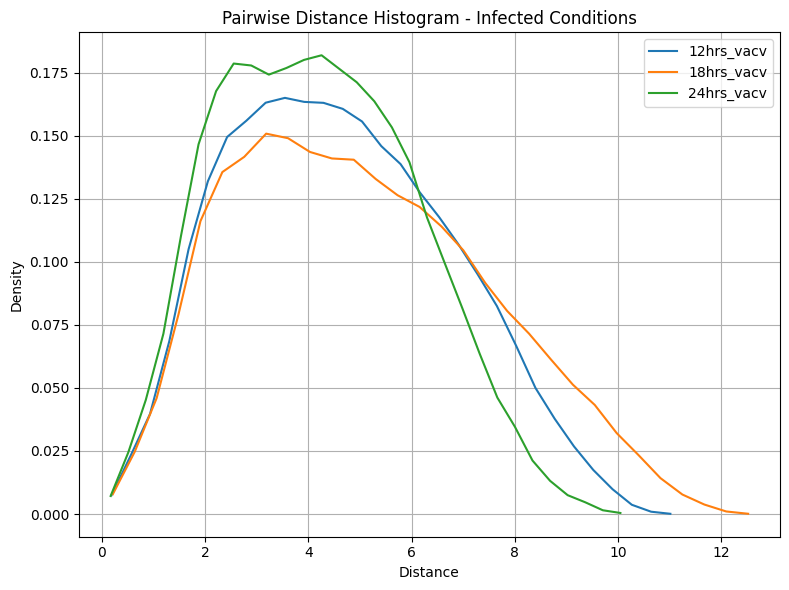

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy

# Settings
base_path = "data/green_monkey/all_structure_files/chr1"
timepoints = ["12hrs", "18hrs", "24hrs"]
conditions = ["vacv"]

# Collect distance distributions
plot_data = []

for tp in timepoints:
    for cond in conditions:
        file_path = os.path.join(base_path, tp, cond, f"structure_{tp}_{cond}_gene_info.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        coords = df[['middle_x', 'middle_y', 'middle_z']].dropna().values
        if len(coords) < 2:
            continue

        dist_matrix = squareform(pdist(coords))
        dists = dist_matrix[np.triu_indices(len(coords), k=1)]

        hist, bins = np.histogram(dists, bins=30, density=True)
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        plot_data.append((bin_centers, hist, f"{tp}_{cond}"))

# Plot all histograms on one figure
plt.figure(figsize=(8, 6))
for bin_centers, hist, label in plot_data:
    plt.plot(bin_centers, hist, label=label)

plt.title("Pairwise Distance Histogram - Infected Conditions")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
